In [8]:
#載入套件
from netCDF4 import Dataset
import netCDF4 as nc

import numpy as np 
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#功能_I：計算參數
def find_para(dada):
    oc = mean(dada)
    return(oc)

#功能_II：計算次數
#tel_fun編寫範例：dada > 20
def find_counts(dada,continue_days):
    
    oc = mean(dada)
    return(oc)


#功能設定---------
#資料夾路徑
#dp = ""
#檔案路徑
fp = r"E:\WorkedatNCDR\sideProject\pr_BCSD_ACCESS1-3.nc"

#分析起點 PS:python起始為0
material_start_yr = 1
#分析終點
material_end_yr = 65
#功能選擇`: 
#1 -> para ->計算參數 預設計算mean
#2 -> count ->計算次數 連續天數預設1
process_function = 2
#時期選擇 "month" 或 "tenday"
#period_type="month"
period_type="tenday"

#預設部分-----------------

#for計算參數 (預設計算mean)
para_to_cal = np.mean
#for連續天數 (預設為1)
continue_day = 1

#依照功能選擇 改變process_mov 
if process_function == 1:
    process_mov = find_para
    show_process = "para_to_cal" + "=" + str(para_to_cal)
    to_process = para_to_cal
elif process_function == 2:
    process_mov = find_counts
    show_process = "continue_day" + "=" + str(continue_day)
    to_process = find_counts

#依功能選擇改變計算長度
if period_type == "month":
    select_mat = "month_mat"
    period_len = 12
    #csv設定 
    #圖片設定
elif period_type == "tenday":
    select_mat = "tenday_mat"
    period_len = 36
    #csv設定 
    #圖片設定
    
#計算長度
cal_length = material_end_yr - material_start_yr +1 

print("使用者設定執行--------------------")
print("檔案路徑：" + fp)
print("分析起點：" + str(material_start_yr))
print("分析終點：" + str(material_end_yr))
print("計算年份長度：" + str(cal_length))
print("執行：" + str(process_mov))
print("預設：" + str(show_process))
print("時期選擇：" + period_type + "/長度設定="+ str(period_len))


使用者設定執行--------------------
檔案路徑：E:\WorkedatNCDR\sideProject\pr_BCSD_ACCESS1-3.nc
分析起點：1
分析終點：65
計算年份長度：65
執行：<function find_counts at 0x00000212FFE29C10>
預設：continue_day=1
時期選擇：month/長度設定=12


讀入nc檔
檢視資料維度
{'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 60, 'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 81, 'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 16790}


<ipython-input-117-1a3b59a33808>:10: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(nc_data.dimensions)


檢視降雨量最大值
1287.7692
檢視降雨量最小值(移除-999和0)
5.569863e-14
(81,)
(60,)
(16790,)
(16790, 81, 60)
{'CDI': 'Climate Data Interface version 1.6.9 (http://mpimet.mpg.de/cdi)', 'Conventions': 'CF-1.4', 'history': 'Fri Feb 03 14:24:46 2017: cdo settaxis,1960-Jan-01,12:00,1day pr2.nc pr_BCSD_ACCESS1-3.nc\nFri Feb 03 14:24:44 2017: cdo setcalendar,365_day pr.nc pr2.nc\nFri Feb 03 14:24:42 2017: cdo -r -f nc import_binary pr_BCSD_ACCESS1-3.ctl pr.nc', 'CDO': 'Climate Data Operators version 1.6.9 (http://mpimet.mpg.de/cdo)'}
------------------------
雨量資料.維度
(16790, 81, 60)
各別檢視維度
(81, 60)
9.1649275
2.1805158e-06
(81, 60)
影像檢視測試
------------------------
檢視時間長度(第一維度)


<ipython-input-117-1a3b59a33808>:31: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(nc_data.__dict__)


(16790, 81, 60)
------------------------
測試尋找空間最大值(取一個時間維度)
------------------------
測試尋找跨時間最大值(形成一個矩陣)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1287.7692
------------------------
測試尋找跨時間最小值(形成一個矩陣)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.0
--------------------
模仿R中的apply處理第三維資料_返回最大值(除去NAN)
python讀進nc檔時間維度為第一個維度
(81, 60)
(16790, 81, 60)
[False False  True ...  True  True False]
16789
[0. 0. 0. ... 1. 0. 0.]
16790
<class 'tuple'>


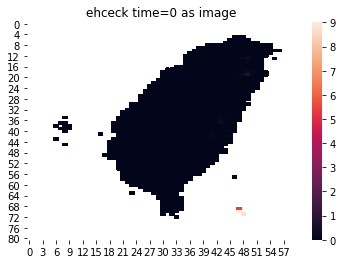

In [117]:


print("讀入nc檔")
#fp = r"C:\Users\rslab\BU\2018NJ\sideProject\pr_BCSD_ACCESS1-0.nc"
#fp = r"C:\Users\rslab\BU\2018NJ\shiny_developing\g4_1_to_20.nc"
#fp = r"C:\Users\rslab\BU\2018NJ\sideProject\pr_BCSD_ACCESS1-3.nc"
#fp = r"E:\WorkedatNCDR\sideProject\pr_BCSD_ACCESS1-3.nc"

nc_data = nc.Dataset(fp)

print("檢視資料維度")
print(nc_data.dimensions)

nc_data_np_array = np.array(nc_data["pr"])

print("檢視降雨量最大值")
print(np.max(nc_data_np_array))

print("檢視降雨量最小值(移除-999和0)")
nc_data_np_array_mask = nc_data_np_array
print(np.min(nc_data_np_array_mask[nc_data_np_array_mask>0]))

lat = nc_data.variables['lat'][:]
lon = nc_data.variables['lon'][:]
tm = nc_data.variables['time'][:]
pr = nc_data.variables['pr'][:]
print(lat.shape)
print(lon.shape)
print(tm.shape)
print(pr.shape)

#顯示字典
print(nc_data.__dict__)

#關閉nc檔連接
nc_data.close() #此處關閉資料 後面需要從上面變數提取資料

print("------------------------")
print("雨量資料.維度")
print(pr.shape)

print("各別檢視維度")
da_for_ig = pr[1,:,:]
da = np.flip(da_for_ig,0)
print(da.shape)
print(np.amax(da))
print(np.amin(da))
mask=np.array([da < 0])
mask.shape=(da.shape)
print(mask.shape)

print("影像檢視測試")
sns.heatmap(da,mask=mask,vmax=9,vmin=0).set_title("ehceck time=0 as image")

print("------------------------")
print("檢視時間長度(第一維度)")
#da_for_cal = nc_data.variables['pr'][:,3,3]
#print(nc_data.variables['pr'].shape)
da_for_cal = pr[:,3,3]
print(pr.shape)

print("------------------------")
print("測試尋找空間最大值(取一個時間維度)")
#pr_array = np.matrix(nc_data.variables['pr'][1,:,:])
pr_array = np.array(pr)
pr_array.shape=(16790, 81, 60)
#print(pr_array.max())

print("------------------------")
print("測試尋找跨時間最大值(形成一個矩陣)")
#print(np.nanmax(pr_array,0))
for_plt_max = np.nanmax(pr_array,0)
for_plt_max[for_plt_max < 0] = 0
print(for_plt_max)
print(for_plt_max.max())

print("------------------------")
print("測試尋找跨時間最小值(形成一個矩陣)")
#print(np.nanmax(pr_array,0))
for_plt_min = np.nanmin(pr_array,0)
for_plt_min[for_plt_min < 0] = 0
print(for_plt_min)
print(for_plt_min.min())

print("--------------------")
print("模仿R中的apply處理第三維資料_返回最大值(除去NAN)")
print("python讀進nc檔時間維度為第一個維度")

find_nanmax = lambda x: np.nanmax(x,0)
nanmax_oc = np.apply_along_axis(find_nanmax,0,pr)
print(nanmax_oc.shape)

tel_array = pr_array > 1
find_diff = lambda x: np.diff(x,0)
tel_diff_oc = np.apply_along_axis(find_diff,0,tel_array)
print(tel_diff_oc.shape)

print(np.diff(tel_array[:,40,30]))
print(len(np.diff(tel_array[:,40,30])))

tel_array_01 = np.zeros(len(tel_array[:,40,30]))
tel_array_01[tel_array[:,40,30]==1]=1

print(tel_array_01)
print(len(tel_array_01))

diff_01 = np.diff(tel_array_01)
pos_of_one = np.where(diff_01==1)
pos_of_minus_one = np.where(diff_01==-1)

print(type(pos_of_one))
#print(len(pos_of_one)
#print(len(pos_of_minus_one, dtype=int64))

#np.diff(tel_array[:,40,30])==1


檢視色階圖
(81, 60)
檢視頻度圖


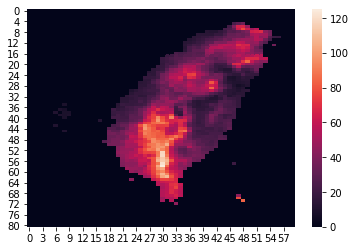

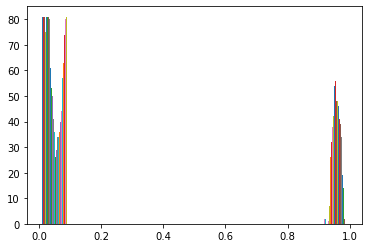

In [105]:
#給定篩選值
given_criterion = 25
#給定連續天數
continue_criterion = 3

#產生篩選值T/F array
tel_array = pr_array > given_criterion
find_diff = lambda x: np.diff(x,0)
tel_diff_oc = np.apply_along_axis(find_diff,0,tel_array)
#print(tel_diff_oc.shape)


def find_countz(x):
    tel_array_01 = np.zeros(len(x))
    tel_array_01[x==1]=1
    diff_01 = np.diff(tel_array_01)
    pos_of_one = np.where(diff_01==1)
    pos_of_minus_one = np.where(diff_01==-1)
    #oc = len(pos_of_one)==len(pos_of_minus_one)
    if len(pos_of_minus_one[0]) == len(pos_of_one[0]):
        continu_len = pos_of_minus_one[0] - pos_of_one[0] 
    elif len(pos_of_minus_one[0]) != len(pos_of_one[0]):
        continu_len = np.append(pos_of_minus_one[0],len(x)) - pos_of_one[0] 
    oc = sum(continu_len > continue_criterion)
    return(oc)

find_countz_oc = np.apply_along_axis(find_countz,0,tel_array)

import matplotlib as mpl
import matplotlib.pyplot as plt

print("檢視色階圖")
print(find_countz_oc.shape)

plot1 = plt.figure(1)
sns.heatmap(np.flip(find_countz_oc,0))


print("檢視頻度圖")

plt.figure(2)
plt.hist(find_countz_oc > 3)

plt.show()

criterion_25_continue_3_heatmapt.png


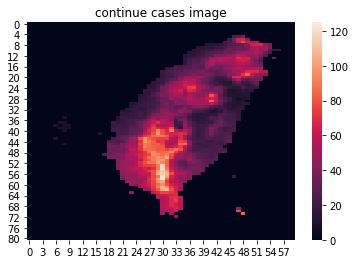

In [116]:
#輸出圖片
set_fn = f"criterion_{given_criterion}_continue_{continue_criterion}_heatmapt.png"
print(set_fn)
sns.heatmap(np.flip(find_countz_oc,0)).set_title("continue cases image")
plt.savefig(set_fn)